# Instrucciones para el exámen

<strong>Objetivo:</strong> Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

## Contexto y Descripción del Dataset

El «[Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

## Diccionario de Datos:

1. Pregnancies: Número de embarazos.
2. Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
3. BloodPressure: Presión arterial diastólica (mm Hg).
4. SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
5. Insulin: Niveles séricos de insulina a las 2 horas (mu U/ml).
6. BMI: Índice de masa corporal (peso en kg / (altura en m)^2).
7. DiabetesPedigreeFunction: Función de pedigrí de diabetes.
8. Age: Edad (años).
9. Outcome: Variable objetivo (1: diabetes, 0: no diabetes).

## Requisitos:

1. Limpieza de datos:

* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

2. Exploración de Datos:

* Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

3. Implementación de Modelos:

* Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
* Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
* Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

## Entrega

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

* Proceso completo de limpieza y preprocesamiento de datos.
* Visualizaciones y estadísticas descriptivas.
* Implementación y evaluación de los modelos de clasificación.
* Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

## Consideraciones Éticas y Tecnológicas

### Consideraciones Éticas:

* Transparencia y Reproducibilidad: Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
* Imparcialidad y Sesgo: Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

### Consideraciones Tecnológicas:

* Herramientas Utilizadas: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
* Escalabilidad: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
* Optimización de Modelos: Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.

# Resolución

## Carga de datos

In [724]:
import pandas as pd


camino_ds = "../data/diabetes.csv"

df = pd.read_csv(camino_ds, delimiter=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Haciendo un análisis inicial, podemos notar que no existen columnas de tipo nulo. Tampoco parecen haber columnas de tipo categóricas, pero se realizará un análisis exhaustivo más adelante.

In [725]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


## 1. Limpieza de datos

### Identificación y eliminación de valores duplicados

In [726]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


En general, no parece haber valores duplicados. Por este motivo, no es necesario eliminar duplicados.

### Verificación y ajuste de tipos de datos:

Verificamos primero las columnas booleanas

In [727]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no", "N"]:
        return False

    if x in [1, 1.0, "true", "yes", "si", "Y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'Outcome': [1 0]
La columna 'Outcome' es booleana. Será convertida.
Columnas convertidas a booleanas: ['Outcome']


Podemos ver que solamente la variable objetivo 'Outcome' posee valores booleanos. Notar además, que el código imprime todas las columnas que tienen solo 2 valores, para permitir ajustes en las listas de posibilidades en caso de que se requiera agregar otras opciones.

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


Como no existen columnas de tipo objeto, no es necesario investigar las columnas categóricas.

Verificamos ahora los datos estadísticos de las columnas para ver si están fuera de rango:

In [729]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Pregnancies,768.00,0.00,17.00,3.85,3.37,3.00,0.88
Glucose,768.00,0.00,199.00,120.89,31.97,117.00,0.26
BloodPressure,768.00,0.00,122.00,69.11,19.36,72.00,0.28
SkinThickness,768.00,0.00,99.00,20.54,15.95,23.00,0.78
Insulin,768.00,0.00,846.00,79.80,115.24,30.50,1.44
BMI,768.00,0.00,67.10,31.99,7.88,32.00,0.25
DiabetesPedigreeFunction,768.00,0.08,2.42,0.47,0.33,0.37,0.70
Age,768.00,21.00,81.00,33.24,11.76,29.00,0.35


De las estadísticas podemos sacar:

* El máximo de Pregnancies es alto, no obstante no es imposible que se de la situación, por lo que sería un outlier válido. Por lo cual, estos valores se asumen que son correctos
* Los rangos normales de Glucose son de 70 a 100 de acuerdo a la WHO. El máximo encontrado no se aleja demasiado de estos rangos, por lo que se asume que solamente son rangos anormales y no valores incorrectos. Los valores que tal vez estén incorrectos son los de 0, ya que no es una situación común. Probablemente la persona haya fallecido en ese caso. No obstante no se indica este dato en el dataset, por lo cual se asume que esto es incorrecto. Como la desviación estándar es baja respecto al promedio, en estos casos se imputará por el promedio.
* En el caso de BloodPressure, el rango normal es de 90 a 120, y los máximos también pueden ocurrir. Lo que es muy improbable es que el blood pressure sea 0 y la persona esté aún viva, lo cual es el mismo caso que en Glucose. También se puede imputar en estos casos usando el promedio, ya que la relación entre la desviación estándar y el promedio es baja.
* Lo mismo pasa con SkinThickness, el valor mínimo es improbable ya que el thickness de la piel no puede ser 0. Para estos casos, se imputará la mediana ya que la desviación estandar es muy alta en comparación con el promedio.
* En el caso de la insulina, tampoco puede ser 0 o la persona está en riesgo de muerte. Sí puede ser bajo pero no 0. Por lo cual, se opta por imputar con la mediana en estos casos, ya que el promedio no es representativo.
* BMI tampoco puede ser 0 ya que está basado en el peso de la persona. Se opta por imputar con el promedio cuando corresponda ya que la desviación estándar es baja.
* DiabetesPedigreeFunction sí está en rangos normales (0.08-2.4)
* La columna Age está en rangos normales.

Verificamos primeramente si existen casos en las que todas las columnas de la fila son 0, para identificar y eliminar las mismas.

In [730]:
df[(df==0).all(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Al parecer, no se encuentran filas en las que todas las columnas sean 0. Verificamos ahora solo para estas columnas.

In [731]:
df[(df["Glucose"] == 0) & (df["BloodPressure"] == 0) & (df["SkinThickness"] == 0) & (df["Insulin"] == 0) & (df["BMI"] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Verificamos ahora la cantidad de incorrectos, para verificar si imputar no causaría sesgos en los datos.

In [732]:
for columna in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    cant_ceros = df[df[columna] == 0][columna].count()
    porc_ceros = (cant_ceros / df.shape[0]) * 100
    print(f"Cant. ceros para columna {columna}: {cant_ceros}. Porc: {porc_ceros:.2f}")

Cant. ceros para columna Glucose: 5. Porc: 0.65
Cant. ceros para columna BloodPressure: 35. Porc: 4.56
Cant. ceros para columna SkinThickness: 227. Porc: 29.56
Cant. ceros para columna Insulin: 374. Porc: 48.70
Cant. ceros para columna BMI: 11. Porc: 1.43


Como el porcentaje de SkinThickness y Insulin de 0 es muy alto, no es aconsejable imputarlos ya que la imputación puede sesgar los datos. Por lo cual, para estas columnas, se opta por no imputar.

Tampoco se pueden identificar casos de este tipo. Por lo cual, se deben imputar las columnas de acuerdo a los criterios seleccionados.

In [733]:
def imputar_incorrectos(df_objetivo):
    # Glucose
    promedio_glucosa = df_objetivo["Glucose"].mean()
    df_objetivo["Glucose"] = df_objetivo["Glucose"].apply(lambda x: promedio_glucosa if x == 0 else x)

    # BloodPressure
    promedio_blood_pressure = df_objetivo["BloodPressure"].mean()
    df_objetivo["BloodPressure"] = df_objetivo["BloodPressure"].apply(lambda x: promedio_blood_pressure if x == 0 else x)

    # SkinThickness
    # mediana_skin_thickness = df_objetivo["SkinThickness"].median()
    # df_objetivo["SkinThickness"] = df_objetivo["SkinThickness"].apply(lambda x: mediana_skin_thickness if x == 0 else x)

    # Insulin
    # mediana_insulin = df_objetivo["Insulin"].median()
    # df_objetivo["Insulin"] = df_objetivo["Insulin"].apply(lambda x: mediana_insulin if x == 0 else x)

    # BMI
    promedio_bmi = df["BMI"].median()
    df_objetivo["BMI"] = df_objetivo["BMI"].apply(lambda x: promedio_bmi if x == 0 else x)



imputar_incorrectos(df)

In [734]:
obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Pregnancies,768.00,0.00,17.00,3.85,3.37,3.00,0.88
Glucose,768.00,44.00,199.00,121.68,30.44,117.00,0.25
BloodPressure,768.00,24.00,122.00,72.25,12.12,72.00,0.17
SkinThickness,768.00,0.00,99.00,20.54,15.95,23.00,0.78
Insulin,768.00,0.00,846.00,79.80,115.24,30.50,1.44
BMI,768.00,18.20,67.10,32.45,6.88,32.00,0.21
DiabetesPedigreeFunction,768.00,0.08,2.42,0.47,0.33,0.37,0.70
Age,768.00,21.00,81.00,33.24,11.76,29.00,0.35


Fueron imputadas las columnas con valores incorrectos/improbables.

### Corrección de inconsistencias en valores categóricos:

No existen columnas categóricas, por lo cual este paso no es necesario para este dataset.

### Manejo de valores faltantes adecuadamente:

In [735]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
Pregnancies,768,0,0.00
Glucose,768,0,0.00
BloodPressure,768,0,0.00
SkinThickness,768,0,0.00
Insulin,768,0,0.00
BMI,768,0,0.00
DiabetesPedigreeFunction,768,0,0.00
Age,768,0,0.00
Outcome,768,0,0.00


No existen valores nulos en este dataset, por lo cual no es necesario manejar valores faltantes.

## 2. Exploración de Datos:

### Visualizaciones univariadas y multivariadas:

#### Histogramas

In [736]:
from utils.eda_utils import obtener_columnas_numericas_df, graficar_histogramas


columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

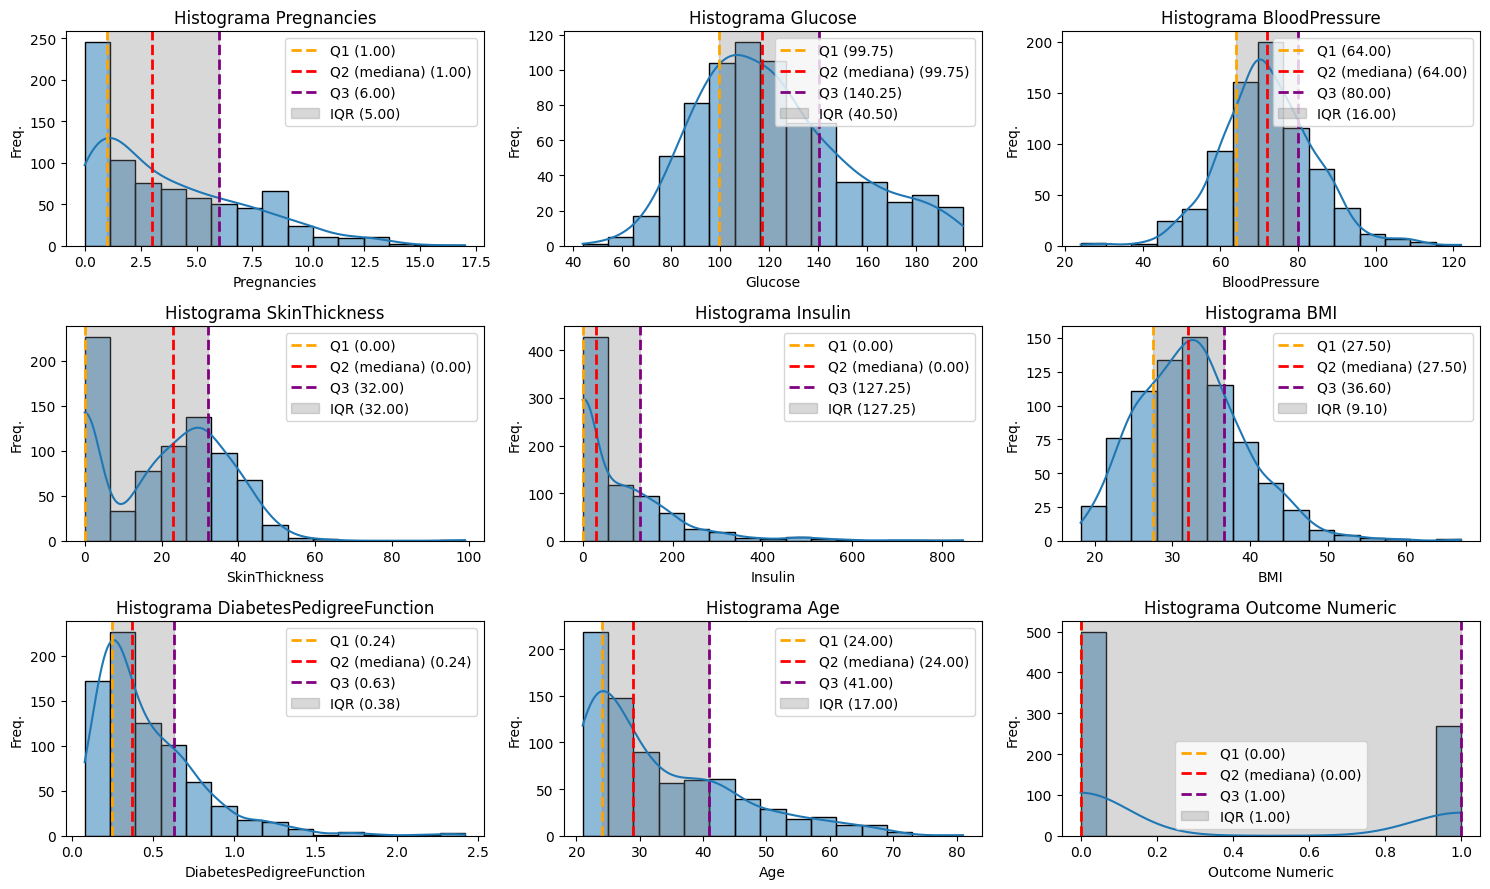

In [737]:
# Agregamos también outcome para visualizar la distribución.
df["Outcome Numeric"] = df["Outcome"].apply(lambda x: 1.0 if x else 0.0)
graficar_histogramas(df, columnas_numericas + ["Outcome Numeric"], nro_columnas=3, kde=True, bins=15, figsize=(15, 9))

De los histogramas, podemos notar:

* La mayoría de las columnas no parecen tener una distribución normal. Por ej: Pregnancies, Insulin, Age. Se debe considerar al momento de elegir técnicas de escalamiento.
* Podemos notar  un leve desbalance en la columna Outcome, que es la variable a ser predicha. Se debe tener en cuenta al momento de entrenar los modelos.

#### Boxplots

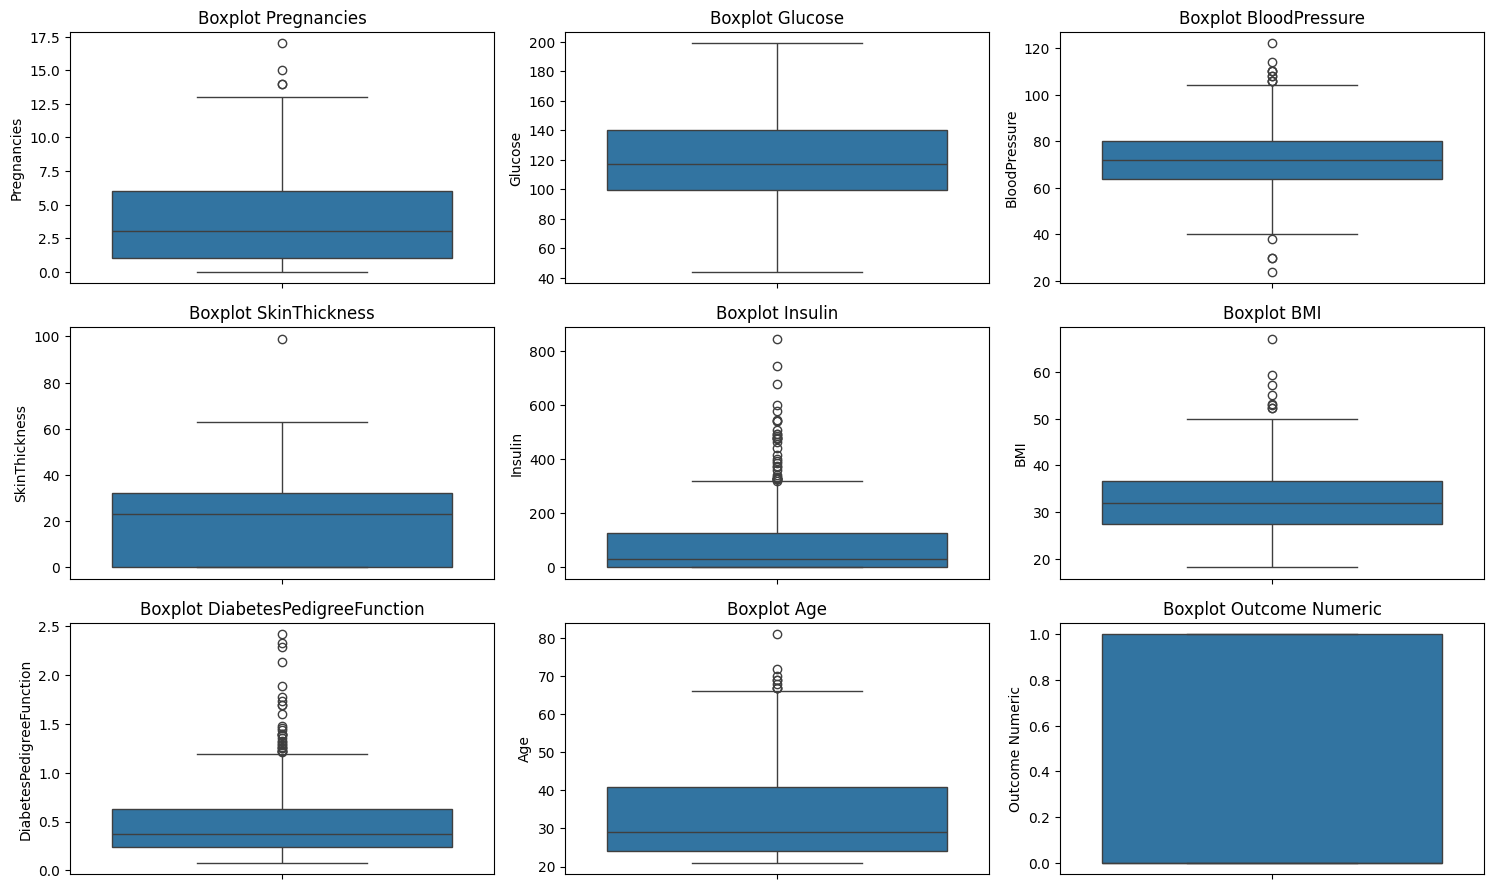

In [738]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas + ["Outcome Numeric"], nro_columnas=3, figsize=(15, 9))

Podemos notar lo siguiente:
* Existen varias columnas con muchos outliers, por ej: BloodPressure, Insulin, BMI, DiabetesPedigreeFunction. Las demás columnas poseen outliers pero no muchas.
* Esto nos indica que al momento de escalado lo mejor sería posiblemente usar la técnica de escalamiento RobustScaler

#### Mapas de Correlaciones

                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.21          -0.08   
Glucose                          0.13     1.00           0.22           0.07   
BloodPressure                    0.21     0.22           1.00           0.02   
SkinThickness                   -0.08     0.07           0.02           1.00   
Insulin                         -0.07     0.33          -0.04           0.44   
BMI                              0.02     0.23           0.28           0.38   
DiabetesPedigreeFunction        -0.03     0.14           0.00           0.18   
Age                              0.54     0.27           0.33          -0.11   
Outcome Numeric                  0.22     0.49           0.16           0.07   

                          Insulin  BMI  DiabetesPedigreeFunction   Age  \
Pregnancies                 -0.07 0.02                     -0.03  0.54   
Glucose                      0.33 0.23             

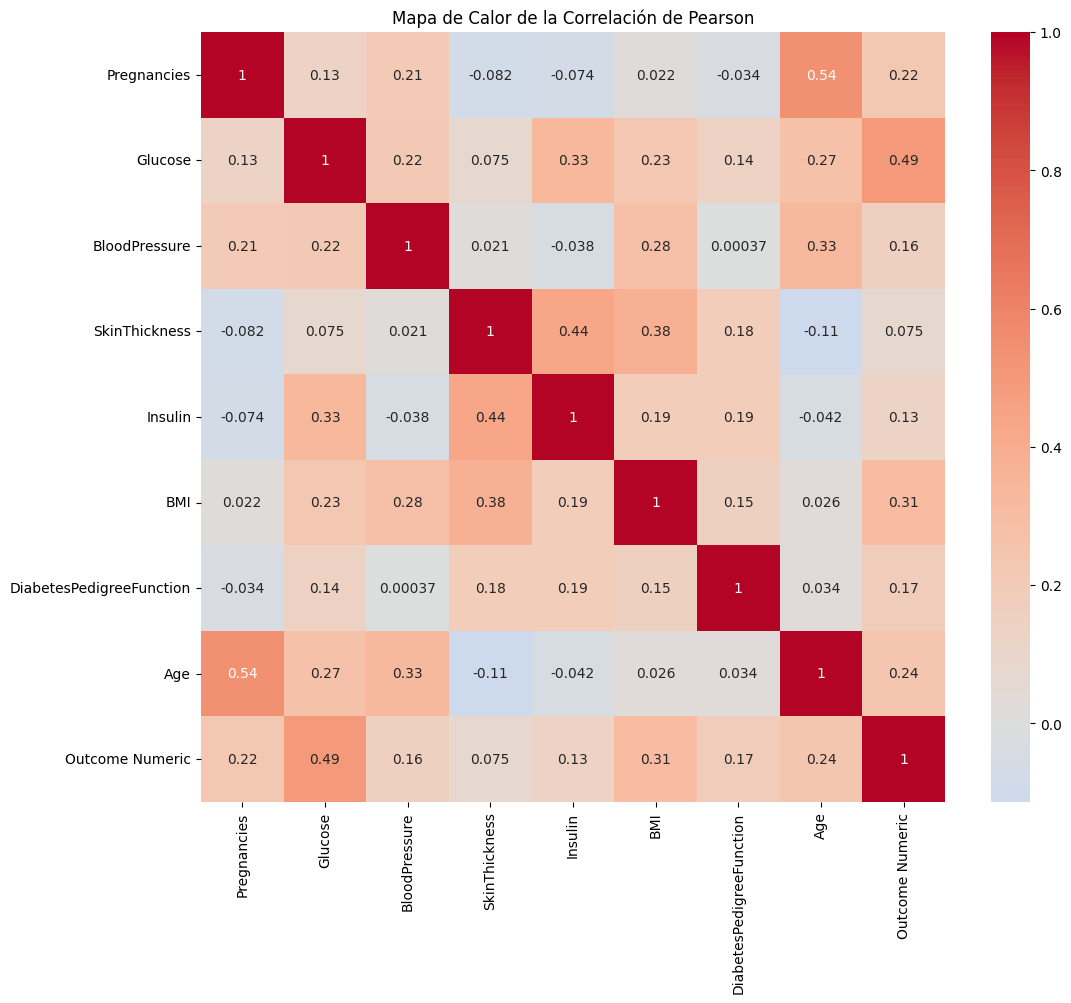

In [739]:
from utils.eda_utils import graficar_mapa_correlacion

graficar_mapa_correlacion(df, columnas_numericas + ["Outcome Numeric"], figsize=(12, 10))


Podemos notar correlaciones en las sgtes columnas:

* Pregnancies
* Glucose
* Insulin
* BMI
* Age

Si bien las correlaciones no son muy fuertes, están por encima de 0.1, así que se deben tener en cuenta.

In [740]:
df.drop("Outcome Numeric", axis=1, inplace=True)

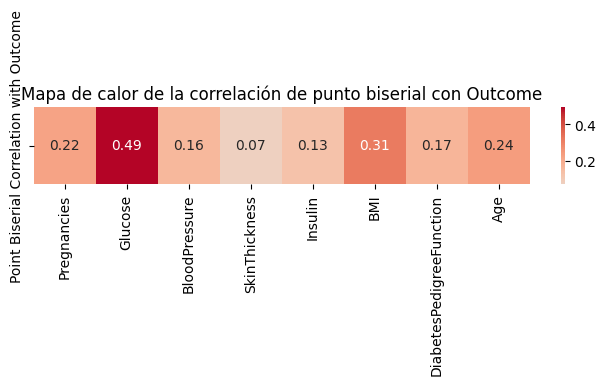

In [741]:
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = obtener_columnas_numericas_df(df)
corr = {col: pointbiserialr(df['Outcome'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
corr_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Point Biserial Correlation with Outcome'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(8, 1))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con Outcome')
plt.show()

Del mapa de correlación de punto biserial, podemos notar que se encuentran las mismas correlaciones con Outcome con las columnas que las vistas contra Outcome Numeric en el mapa de correlaciones de pearson.

#### Gráficos de dispersión

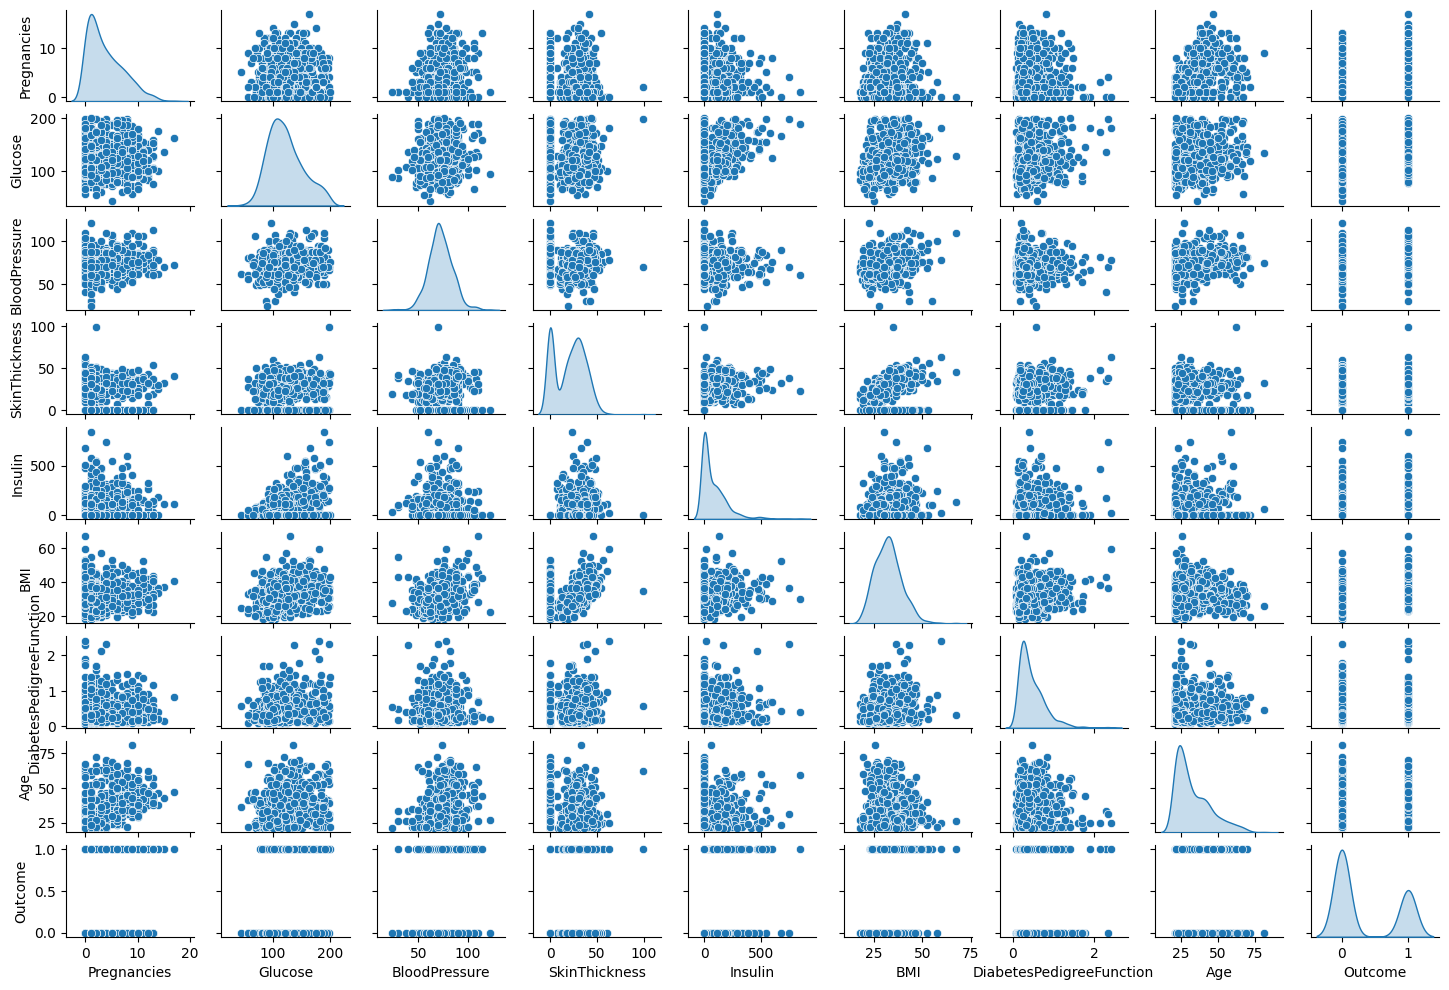

In [742]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Spectral")
g = sns.pairplot(df[[*columnas_numericas] + ["Outcome"]], height=1.2, diag_kind = 'kde')
g.figure.set_size_inches(15, 10)
plt.show()

Podemos notar en los gráficos de dispersión, que existen pocas correlaciones muy fuertes. Las excepciones son:

* Glucose vs Insulin: Se puede notar un leve incremento de glucosa con respecto a la insulina hacia los valores mas altos. Para los valores más bajos sigue existiendo mucha dispersión.
* SkinThickness vs BMI: se puede notar que SkinThickness incrementa levemente a medida que incrementa el BMI.

#### Gráficos de Barras

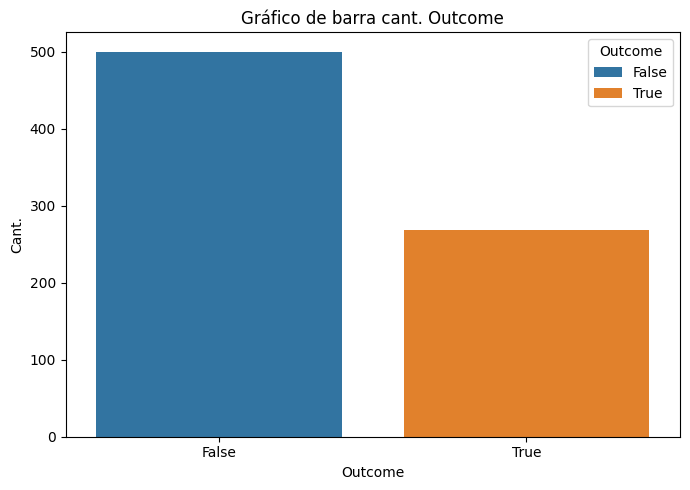

In [743]:
from utils.eda_utils import graficar_barras_conteo

graficar_barras_conteo(df, ["Outcome",], nro_columnas=1, figsize=(7, 5))

Podemos notar el desbalanceo en los datos. Verificamos cuales son los valores.

In [744]:
df.groupby("Outcome").count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
False,500,500,500,500,500,500,500,500
True,268,268,268,268,268,268,268,268


Efectivamente, se puede notar queu solamente existen 268 casos positivos, mientras que existen 500 casos negativos. Esto se debe tener en cuenta al elaborar modelos ya que existen más muestras negativas que positivas.

### Estadísticas descriptivas

Ya se estuvo realizando al momento de realizar la imputación, pero se hace de vuelta para mejor visualización.

In [745]:
obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Pregnancies,768.00,0.00,17.00,3.85,3.37,3.00,0.88
Glucose,768.00,44.00,199.00,121.68,30.44,117.00,0.25
BloodPressure,768.00,24.00,122.00,72.25,12.12,72.00,0.17
SkinThickness,768.00,0.00,99.00,20.54,15.95,23.00,0.78
Insulin,768.00,0.00,846.00,79.80,115.24,30.50,1.44
BMI,768.00,18.20,67.10,32.45,6.88,32.00,0.21
DiabetesPedigreeFunction,768.00,0.08,2.42,0.47,0.33,0.37,0.70
Age,768.00,21.00,81.00,33.24,11.76,29.00,0.35


Podemos ver que, salvo en las columnas Pregnancies, Insulin, SkinThickness, DiabetesPedigreeFunction, el promedio es representativo ya que el coeficiente de variación es bajo.

#### Visualización de datos de outliers.

In [746]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
Pregnancies,4.00,0.52,-6.50,13.50
Glucose,0.00,0.00,39.00,201.00
BloodPressure,14.00,1.82,40.00,104.00
SkinThickness,1.00,0.13,-48.00,80.00
Insulin,34.00,4.43,-190.88,318.12
BMI,8.00,1.04,13.85,50.25
DiabetesPedigreeFunction,29.00,3.78,-0.33,1.20
Age,9.00,1.17,-1.50,66.50


De los datos de outliers, podemos notar SkinThickness y Insulin con un porcentaje relativamente alto de outliers. Por este motivo, la técnica de escalamiento más apropiada probablemente sea la de RobustScaler.

## Implementación de Modelos

### Preparamiento previo a implementación de los modelos

Primero que nada, seleccionamos las columnas de predicción y de salida.

In [747]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [748]:
columnas_prediccion = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    # 'Outcome',
]

campo_salida = "Outcome"

X = df[[*columnas_prediccion]]
y = df[campo_salida]

In [749]:
print("Columnas Seleccionadas:")

for columna in columnas_prediccion:
    print(f"-{columna}")

Columnas Seleccionadas:
-Pregnancies
-Glucose
-BloodPressure
-SkinThickness
-Insulin
-BMI
-DiabetesPedigreeFunction
-Age


Importamos las librerías necesarias

In [750]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

Implementamos el código de preprocesamiento.

In [751]:
preprocessor_scale = ColumnTransformer(
    transformers=[
        # Solamente imputamos las columnas que definimos que se imputarían
        # con la mediana.
        ("num", RobustScaler(), columnas_prediccion),
    ],
    remainder="passthrough"
)

Verificamos que el preprocesamiento se realiza correctamente.

In [752]:
X_transf_scale = preprocessor_scale.fit_transform(X)

df_transf_scale = pd.DataFrame(X_transf_scale, columns=preprocessor_scale.get_feature_names_out())

df_transf_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   num__Pregnancies               768 non-null    float64
 1   num__Glucose                   768 non-null    float64
 2   num__BloodPressure             768 non-null    float64
 3   num__SkinThickness             768 non-null    float64
 4   num__Insulin                   768 non-null    float64
 5   num__BMI                       768 non-null    float64
 6   num__DiabetesPedigreeFunction  768 non-null    float64
 7   num__Age                       768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


In [753]:
obtener_estadisticas_datos_nulos(df_transf_scale)

,datos sin NAs en q,Na en q,Na en %
num__Pregnancies,768,0,0.00
num__Glucose,768,0,0.00
num__BloodPressure,768,0,0.00
num__SkinThickness,768,0,0.00
num__Insulin,768,0,0.00
num__BMI,768,0,0.00
num__DiabetesPedigreeFunction,768,0,0.00
num__Age,768,0,0.00


Notar que el escalador solamente es requerido para ciertos modelos, por lo cual se optará por usar o no usar este preprocesador de acuerdo a la necesidad. No es necesario transformar columnas categóricas ya que en este dataset no existen.

### División del Dataset en train y test

In [754]:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

### Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.

#### Random Forests

Este modelo no requiere escalameinto ya que está basado en árboles de decision, por lo cual solamente se tiene el paso de entrenamiento.

In [755]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

RandomForestClassifier()

#### XGBoost

Este modelo no requiere de escalamiento ya que el modelo débil de xgboost por defecto es un decision tree. En caso de que se opte por otro, tal vez sí se necesite escalamiento, pero no sería necesario en este caso.

In [756]:
# Configuración de los datos para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Configuración de parámetros para XGBoost
xgb_params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,  # Learning rate
    "max_depth": 3,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
}

# Diccionario para almacenar los resultados de evaluación de XGBoost
xgb_evals_result = {}

# Entrenar el modelo de XGBoost con registro de resultados
xgb_eval = [(dtrain, "train"), (dtest, "test")]
xb = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric='logloss',
    eta="0.1",
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

xb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta='0.1', eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

#### Adaboost

Este modelo tampoco necesita escalamiento, ya que se utilizará el DecisionTreeClassifier como weak learner.

Pesos y errores de los weak learners:
    Estimator Index  Estimator Weight  Estimator Error
0                 1              0.92             0.24
1                 2              0.55             0.34
2                 3              0.54             0.34
3                 4              0.37             0.39
4                 5              0.41             0.38
5                 6              0.23             0.43
6                 7              0.21             0.43
7                 8              0.21             0.44
8                 9              0.35             0.39
9                10              0.12             0.46
10               11              0.17             0.45
11               12              0.27             0.42
12               13              0.12             0.46
13               14              0.06             0.48
14               15              0.07             0.48


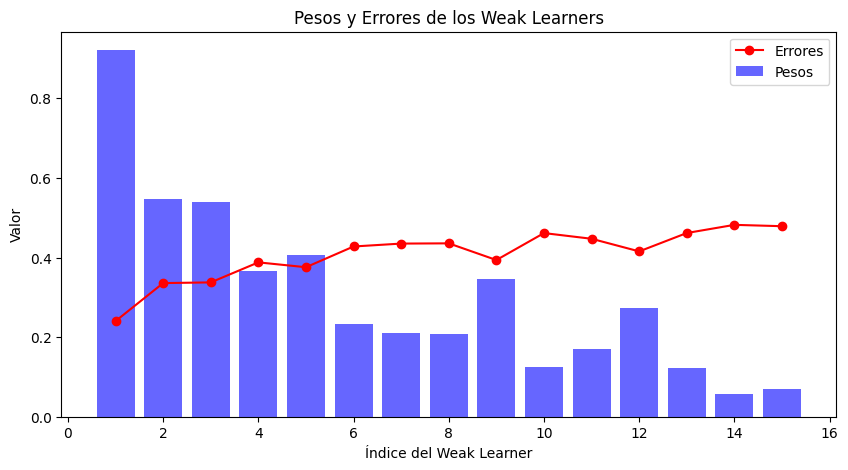

In [757]:
ab = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=15,
    learning_rate=0.8,
    algorithm="SAMME",
    random_state=42
)

ab.fit(X_train, y_train)


# Obtener los pesos y errores de los weak learners
estimator_weights = ab.estimator_weights_
estimator_errors = ab.estimator_errors_

# Crear un DataFrame para mostrar los pesos y errores de los weak learners
estimator_data = {
    "Estimator Index": list(range(1, len(estimator_weights) + 1)),
    "Estimator Weight": estimator_weights,
    "Estimator Error": estimator_errors,
}
estimator_df = pd.DataFrame(estimator_data)

# Mostrar los resultados en la consola
print("Pesos y errores de los weak learners:")
print(estimator_df)

# Visualizar los pesos y errores
plt.figure(figsize=(10, 5))
plt.bar(estimator_data["Estimator Index"], estimator_weights, color="blue", alpha=0.6, label="Pesos")
plt.plot(estimator_data["Estimator Index"], estimator_errors, marker="o", color="red", label="Errores")
plt.xlabel("Índice del Weak Learner")
plt.ylabel("Valor")
plt.title("Pesos y Errores de los Weak Learners")
plt.legend()
plt.show()

#### Gradient Boosting normal

Este modelo también usa árboles de decisión como weak learner por defecto. Por lo que no es necesario escalar.

In [758]:
# Crear y entrenar un modelo de Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=20,  # Número de árboles (learners débiles son árboles de decisión en esta implementación)
    learning_rate=0.1, # Tasa de aprendizaje --> cuánto aprendizaje de lo obtenido en la iteración incorporo
    max_depth=3,       # Profundidad máxima de los árboles
    random_state=42,    # Semilla para reproducibilidad, pues fija el punto de partida
    # Dos parámetros que nos entregan para mover las métricas que vamos a optimizar
    # loss --> la función de pérdida a ser optimizada
    # criterion  --> la función para medir la calidad de splits en los árboles
)

# Entrenar el modelo
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=20, random_state=42)

#### Lazy Predict

In [759]:
from lazypredict.Supervised import LazyClassifier

X_train_scaled = preprocessor_scale.fit_transform(X_train)
X_test_scaled = preprocessor_scale.transform(X_test)

lc = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Entrenar y evaluar los modelos
models, predictions = lc.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Mostrar los resultados
print(models)

 97%|█████████▋| 30/31 [00:00<00:00, 60.34it/s]

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 31/31 [00:00<00:00, 39.77it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Del lazy predict, podemos notar que el mejor modelo encontrado es LGBMClassifier. Se analizará más adelante si es que este es mejor con el set de datos de prueba.

### Evaluación de Modelos

Importamos las librerías requeridas.

In [760]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

from utils.classification_utils import graficar_matrices_confusion, graficar_matriz_confusion

#### Validación cruzada

In [761]:
scorers = ["accuracy", "precision", "recall", "f1", "roc_auc"]

for scoring_seleccionado in scorers:
    score_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring=scoring_seleccionado).mean()
    score_xb = cross_val_score(xb, X_train, y_train, cv=5, scoring=scoring_seleccionado).mean()
    score_ab = cross_val_score(ab, X_train, y_train, cv=5, scoring=scoring_seleccionado).mean()
    score_gb = cross_val_score(gb, X_train, y_train, cv=5, scoring=scoring_seleccionado).mean()

    print("\n")
    print(f"Scoring por {scoring_seleccionado}")
    print(f"Promedio score Random Forests: {score_rf}")
    print(f"Promedio score XBoost: {score_xb}")
    print(f"Promedio score Adaboost: {score_ab}")
    print(f"Promedio score Gradient Boost: {score_gb}")



Scoring por accuracy
Promedio score Random Forests: 0.7764451367255105
Promedio score XBoost: 0.7523018345448251
Promedio score Adaboost: 0.7448944271374177
Promedio score Gradient Boost: 0.7559709241952233


Scoring por precision
Promedio score Random Forests: 0.7054282536151278
Promedio score XBoost: 0.6560979053830189
Promedio score Adaboost: 0.667426788897377
Promedio score Gradient Boost: 0.6974708579547289


Scoring por recall
Promedio score Random Forests: 0.6062588904694167
Promedio score XBoost: 0.6221906116642959
Promedio score Adaboost: 0.5320056899004267
Promedio score Gradient Boost: 0.5479374110953059


Scoring por f1
Promedio score Random Forests: 0.6386129029607289
Promedio score XBoost: 0.6364538331679862
Promedio score Adaboost: 0.5899576530513551
Promedio score Gradient Boost: 0.610005195361189


Scoring por roc_auc
Promedio score Random Forests: 0.8376739881430957
Promedio score XBoost: 0.8378634600602564
Promedio score Adaboost: 0.8243064182194617
Promedio score 

Podemos notar que tanto como en precission como en accuracy, random forests tiende a tener mejor performance con la validación cruzada. Como lo ideal es detectar más casos positivos de diabetes con mayor precisión, este modelo es el que mejor performance está brindando de momento.

#### Random Forests

In [762]:
y_pred_rf = rf.predict(X_test)

classification_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Reporte de Clasificación RF")
print(classification_report_rf)
print("Matriz de confusión RF")
print(conf_matrix_rf)

Reporte de Clasificación RF
              precision    recall  f1-score   support

       False       0.81      0.80      0.81       151
        True       0.63      0.65      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.75      0.75       231

Matriz de confusión RF
[[121  30]
 [ 28  52]]


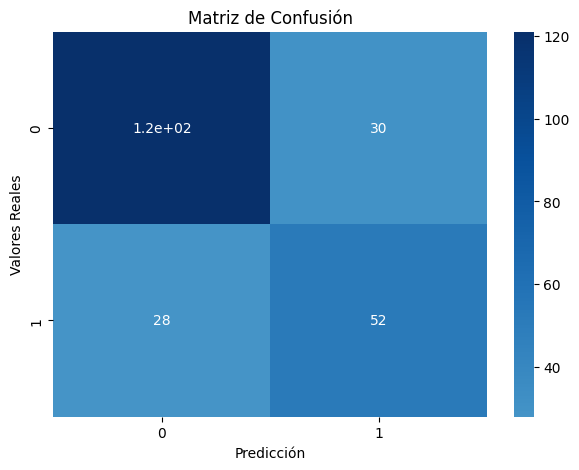

In [763]:
graficar_matriz_confusion(conf_matrix_rf, figsize=(7, 5))

#### XBoost

In [764]:
y_pred_xb = xb.predict(X_test)

classification_report_xb = classification_report(y_test, y_pred_xb)
conf_matrix_xb = confusion_matrix(y_test, y_pred_xb)

print("Reporte de Clasificación XBoost")
print(classification_report_xb)
print("Matriz de confusión XB")
print(conf_matrix_xb)

Reporte de Clasificación XBoost
              precision    recall  f1-score   support

       False       0.84      0.78      0.81       151
        True       0.63      0.71      0.67        80

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231

Matriz de confusión XB
[[118  33]
 [ 23  57]]


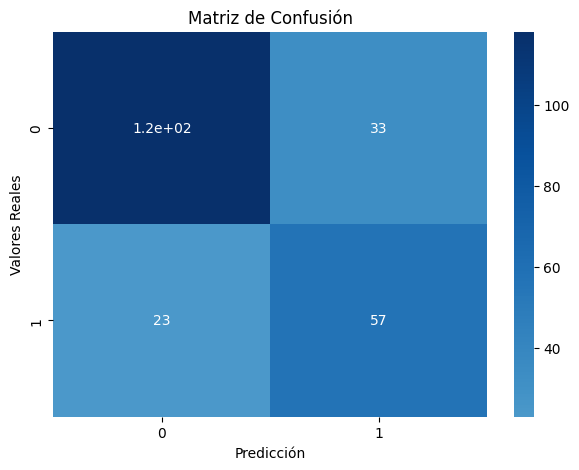

In [765]:
graficar_matriz_confusion(conf_matrix_xb, figsize=(7, 5))

### Adaboost

In [766]:
y_pred_ab = ab.predict(X_test)

classification_report_ab = classification_report(y_test, y_pred_ab)
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)

print("Reporte de Clasificación Adaboost")
print(classification_report_ab)
print("Matriz de confusión Adaboost")
print(conf_matrix_ab)

Reporte de Clasificación Adaboost
              precision    recall  f1-score   support

       False       0.79      0.84      0.82       151
        True       0.66      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

Matriz de confusión Adaboost
[[127  24]
 [ 33  47]]


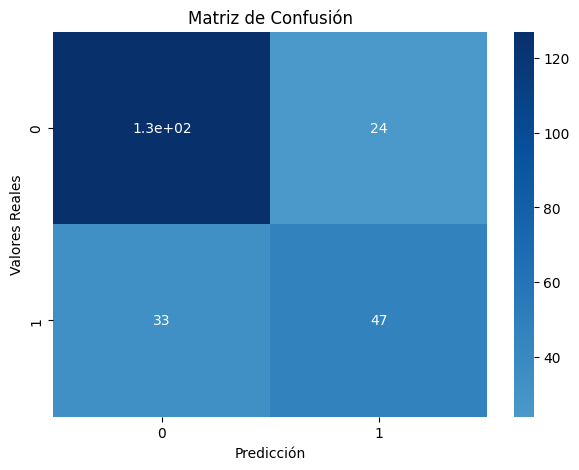

In [767]:
graficar_matriz_confusion(conf_matrix_ab, figsize=(7, 5))

### Gradient boosting

In [768]:
y_pred_gb = gb.predict(X_test)

classification_report_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print("Reporte de Clasificación Gradient Boosting")
print(classification_report_gb)
print("Matriz de confusión Gradient Boosting")
print(conf_matrix_gb)

Reporte de Clasificación Gradient Boosting
              precision    recall  f1-score   support

       False       0.79      0.80      0.80       151
        True       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

Matriz de confusión Gradient Boosting
[[121  30]
 [ 32  48]]


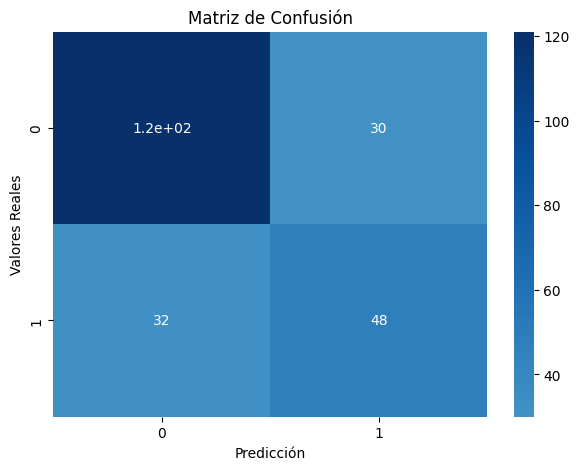

In [769]:
graficar_matriz_confusion(conf_matrix_gb, figsize=(7, 5))

### Curvas ROC/AUC para todos los modelos

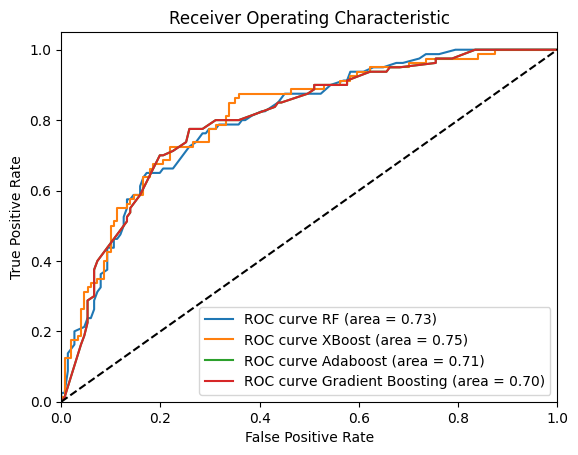

In [770]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_xb = xb.predict_proba(X_test)[:, 1]
y_prob_ab = ab.predict_proba(X_test)[:, 1]
y_prob_gb = ab.predict_proba(X_test)[:, 1]


# Curva ROC y AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)
fpr_xb, tpr_xb, thresholds_xb = roc_curve(y_test, y_prob_xb)
auc_xb = roc_auc_score(y_test, y_pred_xb)
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, y_prob_ab)
auc_ab = roc_auc_score(y_test, y_pred_ab)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
auc_gb = roc_auc_score(y_test, y_pred_gb)


# Plotear la curva ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='ROC curve RF (area = %0.2f)' % auc_rf)
plt.plot(fpr_xb, tpr_xb, label='ROC curve XBoost (area = %0.2f)' % auc_xb)
plt.plot(fpr_ab, tpr_ab, label='ROC curve Adaboost (area = %0.2f)' % auc_ab)
plt.plot(fpr_gb, tpr_gb, label='ROC curve Gradient Boosting (area = %0.2f)' % auc_gb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

De la curva ROC/AUC, podemos notar que la mayoría de los modelos tienen un performance similar, con la diferencia en XBoost, que tiene el mayor area de todos.

### Evaluación de todos los modelos respecto a y_test

In [771]:
def evaluar_modelo(y_test, y_pred_, y_proba_):
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred_),
        "Precision": precision_score(y_test, y_pred_),
        "Recall": recall_score(y_test, y_pred_),
        "F1-Score": f1_score(y_test, y_pred_),
        "ROC-AUC": roc_auc_score(y_test, y_proba_),
    }
    return metrics

rf_metrics = evaluar_modelo(y_test, y_pred_rf, y_prob_rf)
xb_metrics = evaluar_modelo(y_test, y_pred_xb, y_prob_xb)
ab_metrics = evaluar_modelo(y_test, y_pred_xb, y_prob_ab)
gb_metrics = evaluar_modelo(y_test, y_pred_gb, y_prob_gb)

# Comparar en un DataFrame
results = pd.DataFrame(
    [rf_metrics, xb_metrics, ab_metrics, gb_metrics],
    index=["Random Forests", "XGBoost", "Adaboost", "Gradient Boosting"],)
print(results)

print("\n")

print("Mejores modelo basado en cada métrica:\n")
print(results.idxmax(axis=0))

                   Accuracy  Precision  Recall  F1-Score  ROC-AUC
Random Forests         0.75       0.63    0.65      0.64     0.80
XGBoost                0.76       0.63    0.71      0.67     0.81
Adaboost               0.76       0.63    0.71      0.67     0.80
Gradient Boosting      0.73       0.62    0.60      0.61     0.80


Mejores modelo basado en cada métrica:

Accuracy            XGBoost
Precision    Random Forests
Recall              XGBoost
F1-Score            XGBoost
ROC-AUC             XGBoost
dtype: object


De este cálculo, se puede notar que el XGBoost gana en casi todas las métricas excepto Precision. Justamente esta métrica es importante ya que es preferible predecir con mayor precisión los casos positivos de diabetes. En cuanto a accuracy, todos los modelos tienen un performance similar.

### Comparación de Rendimiento

De los resultados obtenidos previamente podemos determinar lo siguiente:


* El modelo XGBoost es el mejor en todas las métricas, con la excepción de Gradient Boosting, que es el mejor en precisión. 
* No obstante, de acuerdo a las matrices de confusión, el XGBoost también es el que mayor cantidad de verdaderos positivos ha detectado (50 para random forests, 57 para XGBoost, 47 para Adaboost, y 48 para Gradient Boosting).
* Las curvas ROC muestran un leve mejor rendimiento en esta métrica de XGBoost.
* Por más que hayan diferencias en las métricas, las mismas son muy menores, indicando que todos los modelos tienen un performance más o menos similar para este dataset.

Finalmente, teniendo en cuenta que el XGBoost es el que más aciertos positivos en diabetes posee de acuerdo a la matriz de confusión, que las demás métricas son mejores en XGBoost, se determina que el mejor modelo para esta tarea es XGBoost.